# Exoplanet Hunting in Deep Space
### By Ali Shannon
In this module, I look at time series light intensity data provided by the Kepler Space Telescope to detect the presence of exoplanets.

The fields are explained here:

1. `LABEL` uses either 1 or 2, where 1 means the star has no orbiting planet and 2 means it has at least one.

2. `FLUX 1 : 3192` are the light intensity data retreived from each planet over some time interval.

I intend to analyze the plots then train a predictor that will understand the relationships between light intensity values and determine whether or not the star has at least one orbiting planet. 

For our purposes, we will assume that there are only two types of stars, ones with orbiting planets and ones with none.

### Acknowledgments

Data is retreived from **[Kaggle](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data/home)**, check out their publicly available datasets for machine learning and data analysis.

In [1]:
import pandas as pd # data analysis
import scipy # stats and dependancies
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # statistics library
import IPython # shell commands

%matplotlib inline

df = pd.read_csv('exoTrain.csv')

In [2]:
y = df['LABEL']
# show the first 5 rows
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### Data visualization

This will display some statistics for the data sets. Blues are 1 (do not contain exoplanets) and Reds are 2 (contain at least one exoplanet)

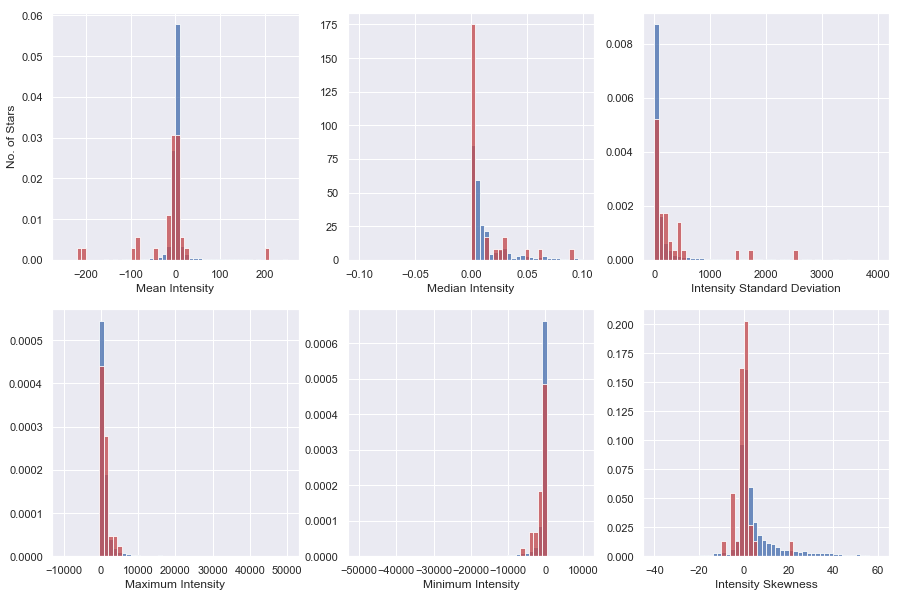

In [3]:
import warnings
warnings.filterwarnings("ignore") # remove featurewarnings

sns.set()

means1 = df[y==1].mean(axis=1)
medians1 = df[y==1].median(axis=1)
std1 = df[y==1].std(axis=1)
maxval1 = df[y==1].max(axis=1)
minval1 = df[y==1].min(axis=1)
skew1 = df[y==1].skew(axis=1)
means2 = df[y==2].mean(axis=1)
medians2 = df[y==2].median(axis=1)
std2 = df[y==2].std(axis=1)
maxval2 = df[y==2].max(axis=1)
minval2 = df[y==2].min(axis=1)
skew2 = df[y==2].skew(axis=1)

# plot each category
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(231)
ax.hist(means1,alpha=0.8,bins=50,color='b',normed=True,range=(-250,250))
ax.hist(means2,alpha=0.8,bins=50,color='r',normed=True,range=(-250,250))
ax.get_legend()
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('No. of Stars')

ax = fig.add_subplot(232)
ax.hist(medians1,alpha=0.8,bins=50,color='b',normed=True,range=(-0.1,0.1))
ax.hist(medians2,alpha=0.8,bins=50,color='r',normed=True,range=(-0.1,0.1))
ax.get_legend()

ax.set_xlabel('Median Intensity')
ax = fig.add_subplot(233)
ax.hist(std1,alpha=0.8,bins=50,normed=True,color='b',range=(0,4000))
ax.hist(std2,alpha=0.8,bins=50,normed=True,color='r',range=(0,4000))
ax.get_legend()

ax.set_xlabel('Intensity Standard Deviation')
ax = fig.add_subplot(234)
ax.hist(maxval1,alpha=0.8,bins=50,normed=True,color='b',range=(-10000,50000))
ax.hist(maxval2,alpha=0.8,bins=50,normed=True,color='r',range=(-10000,50000))
ax.get_legend()

ax.set_xlabel('Maximum Intensity')
ax = fig.add_subplot(235)
ax.hist(minval1,alpha=0.8,bins=50,normed=True,color='b',range=(-50000,10000))
ax.hist(minval2,alpha=0.8,bins=50,normed=True,color='r',range=(-50000,10000))
ax.get_legend()

ax.set_xlabel('Minimum Intensity')
ax = fig.add_subplot(236)
ax.hist(skew1,alpha=0.8,bins=50,normed=True,color='b',range=(-40,60))
ax.hist(skew2,alpha=0.8,bins=50,normed=True,color='r',range=(-40,60)) 
ax.get_legend()

ax.set_xlabel('Intensity Skewness')

plt.show()

### Time varying data analysis.

This will sample out 12 stars of each category and plot the intensities over time.

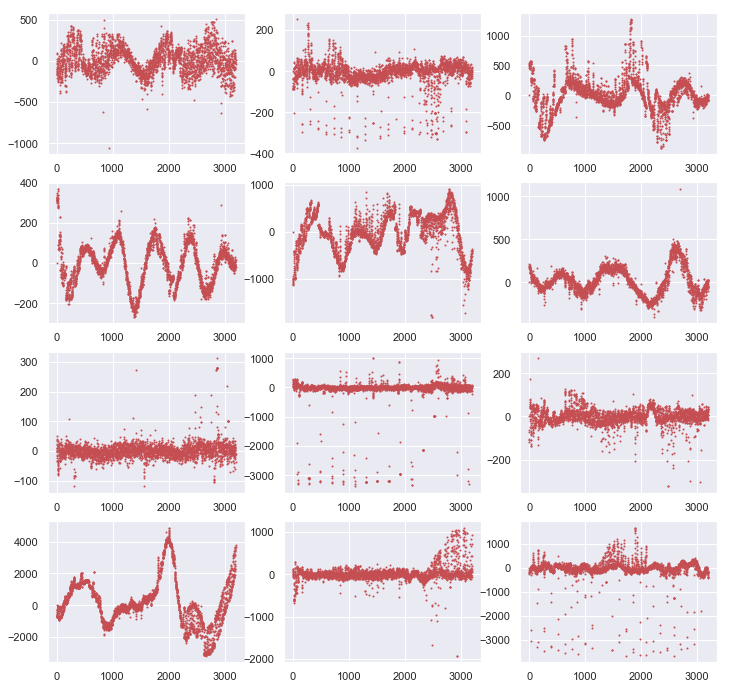

In [4]:
fig = plt.figure(figsize=(12,40))
t = np.array(range(3198))
for i in range(12):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(t,df[y==2].iloc[i,:], s = 1, c = 'r')

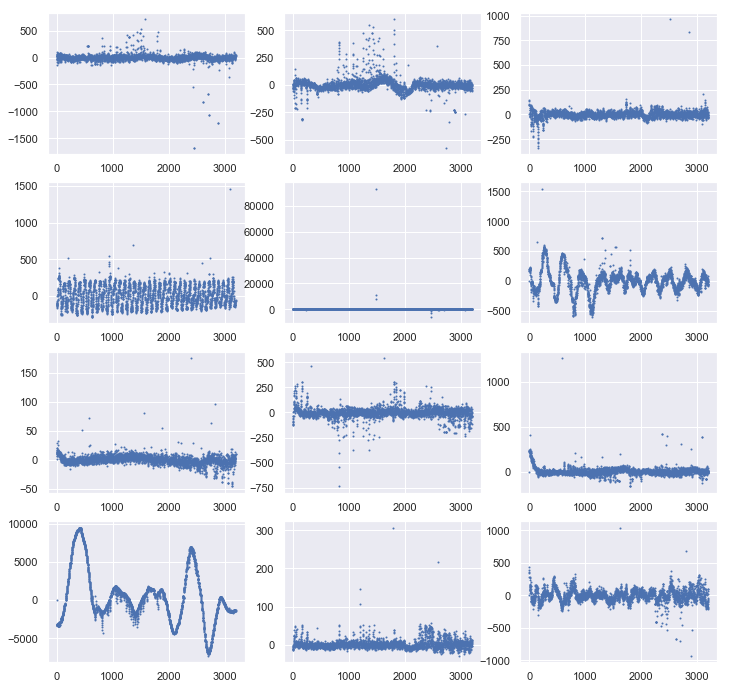

In [5]:
fig = plt.figure(figsize=(12,40))
t = np.array(range(3198))
for i in range(12):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(t,df[y==1].iloc[i,:], s = 1, c = 'b')

Notice that the time varying data is far too difficult for simple boolean statements. We need to employ machine learning algorithms and train the models using this data. Then testing the models against new data to check the accuracy of each ML model.

#### Analysis of how balanced the dataset is.
This will look at the percentage of stars that contain planets versus the ones that don't. If the dataset is imbalanced, then we need to revise the training data since we want the ML model to decern the differences between the classifications of the stars rather than just classify all as the majority.

In [6]:
df['LABEL'].value_counts() # print the sums of each unique value

1    5050
2      37
Name: LABEL, dtype: int64

This seems pretty imbalanced. Let's look at the percentages:

In [7]:
print('Stars with no planets are', round(df['LABEL'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Stars with orbiting planets are', round(df['LABEL'].value_counts()[2]/len(df) * 100,2), '% of the dataset')

Stars with no planets are 99.27 % of the dataset
Stars with orbiting planets are 0.73 % of the dataset


The data is far too *Imbalanced*. Thus we need to somehow balance the dataset before applying machine learning or else it will just classify all stars as they have no exoplanets instead of learning the differences.

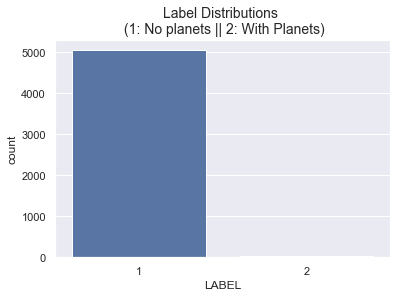

In [8]:
sns.countplot('LABEL', data=df)
plt.title('Label Distributions \n (1: No planets || 2: With Planets)', fontsize=14);

### Machine learning
Here I will work with **scikit-learn** libraries and print the prediction accuracy using the testing file `exoTest.csv` which will be uploaded with this document.

In [9]:
X = df.drop(['LABEL'], axis = 1) # features
# y is already set as the classifiers

# import testing data
test = pd.read_csv('exoTest.csv')
X_test = test.drop(['LABEL'], axis = 1)
y_test = test['LABEL']

First, we need to balance our data. This will be done with a process known as **Random Under Sampling**, this essentially balances the dataset by removing points that make the set imbalanced. 

In [10]:
from imblearn.under_sampling import RandomUnderSampler

X, y = RandomUnderSampler().fit_resample(X, y)

No planets 50.0 % of the dataset
With planets 50.0 % of the dataset


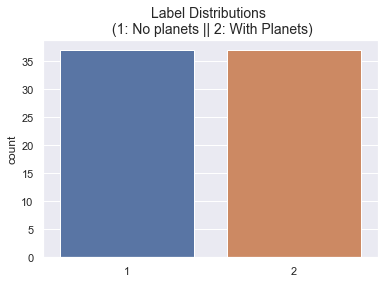

In [11]:
print('No planets', round(np.count_nonzero(y == 1)/len(y) * 100,2), '% of the dataset')
print('With planets', round(np.count_nonzero(y == 2)/len(y) * 100,2), '% of the dataset')

# plot the sampled dataset
sns.countplot(y)
plt.title('Label Distributions \n (1: No planets || 2: With Planets)', fontsize=14);

Now the dataset is balanced and ready for machine learning analysis. 37 of each classification is used for training.

In [12]:
# this is Decision Tree Classifier method
from sklearn import tree

# use the data from before 'exoTrain.csv' for training
decTree = tree.DecisionTreeClassifier().fit(X,y)

# this is to check the accuracy versus testing data
from sklearn.metrics import accuracy_score

decTree_score = accuracy_score(y_test, decTree.predict(X_test))

print('Accuracy using Decision Tree Classifier is nearly ' + f'{decTree_score *100} %')

Accuracy using Decision Tree Classifier is nearly 77.54385964912281 %


This is how this decision tree is made

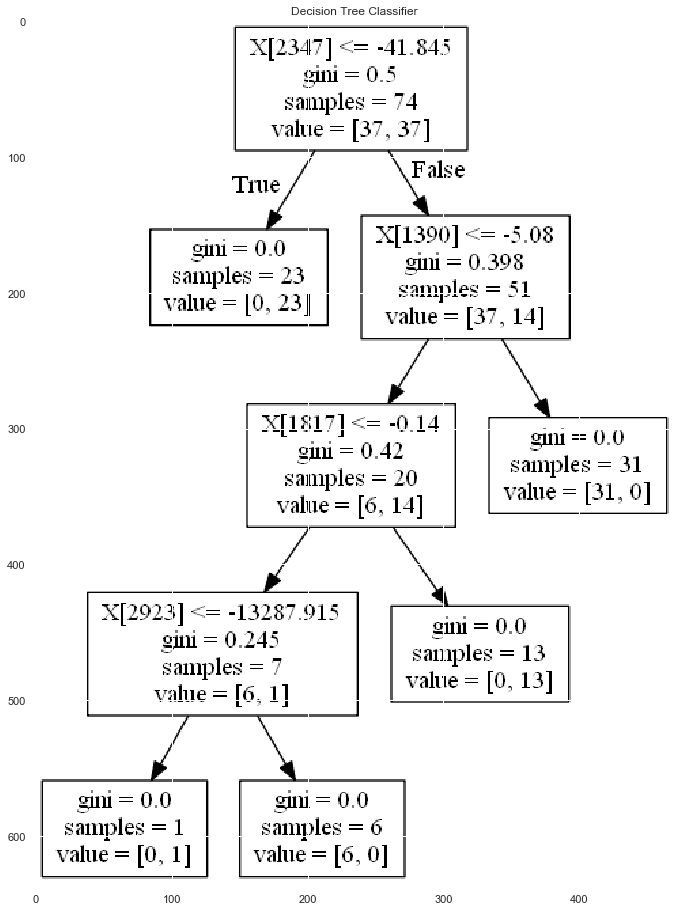

In [13]:
# export to a dot file in the same directory as the notebook
tree.export_graphviz(decTree, out_file='tree.dot')

!! dot -Tpng tree.dot -o tree.png  # convert to png 

import matplotlib.image as mpimg
img=mpimg.imread('tree.png')
plt.imshow(img)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=3.0)
plt.title('Decision Tree Classifier')
plt.show()

In [14]:
# this uses the Support Vector Machine model
from sklearn import svm

clf = svm.SVC(gamma='scale').fit(X, y)

clf_score = accuracy_score(y_test, clf.predict(X_test))

print('Accuracy using Support Vector Machine is nearly ' + f'{clf_score *100} %')

Accuracy using Support Vector Machine is nearly 58.42105263157895 %


In [15]:
# This is the KNN or K-Nearest-Neighbors 
from sklearn.neighbors import KNeighborsClassifier

# leave it at the default k=5
neigh = KNeighborsClassifier().fit(X,y)

neigh_score = accuracy_score(y_test, neigh.predict(X_test))

print('Accuracy using K-Nearest-Neighbors (k = 5) is nearly ' + f'{neigh_score *100} %')

Accuracy using K-Nearest-Neighbors (k = 5) is nearly 94.03508771929825 %


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X, y)

rfc_score = accuracy_score(y_test, rfc.predict(X_test))

print('Accuracy using Random Forest Classifier is nearly ' + f'{rfc_score *100} %')

Accuracy using Random Forest Classifier is nearly 79.82456140350878 %


### Summary

We can predict the presense of at least one exoplanet with up to a 94% accuracy using KNN method. This is probably due to the fact that there is no direct linkage between data points so SVM and DTC are more likely to have false positives.